# ML5

## Import Packages and Data

In [1]:
%matplotlib inline
# Imports Packages
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import sklearn
import numpy as np
from sklearn import metrics

# Normalizing Data
from sklearn.preprocessing import MinMaxScaler

#Import Algorithm
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor

## Data Preprocessing

### *Train Dataset*

In [2]:
# Import Train data
NBE_Train_df = pd.read_excel('ML_Model_Data_2021.xls', sheet_name='Train')

#Filter Element Data
NBE_element_Train_df = NBE_Train_df[NBE_Train_df['Steel_Element'] == 107]

# print(NBE_element_df)
NBE_element_Train_df.head()

,Bridge_Number,Steel_Element,Coating_type,CS1,CS2,CS3,CS4,MAINTENANCE_021,Bridge_Age,ADT_029,...,OPERATING_RATING_064,INVENTORY_RATING_066,STRUCTURAL_EVAL_067,APPR_ROAD_EVAL_072,DECK_STRUCTURE_TYPE_107,SURFACE_TYPE_108A,MEMBRANE_TYPE_108B,DECK_PROTECTION_108C,PERCENT_ADT_TRUCK_109,BRIDGE_CONDITION
0,720544,107,8516,0.999574,0.000000,0.000426,0.000000,1,30,2701,...,0,0,7,8,1,0,0,1,3,3
1,870776,107,8516,1.000000,0.000000,0.000000,0.000000,1,30,21100,...,0,0,7,7,1,0,0,0,5,3
2,870313,107,8516,0.998227,0.001773,0.000000,0.000000,1,60,500,...,0,0,7,8,1,0,0,0,2,3
3,770048,107,8516,0.999934,0.000000,0.000000,0.000066,33,28,27400,...,0,0,7,8,1,0,0,0,12,3
4,940097,107,8516,1.000000,0.000000,0.000000,0.000000,1,44,32959,...,0,0,8,8,1,0,0,0,15,3


In [3]:
NBE_element_Train_df.keys()

Index(['Bridge_Number', 'Steel_Element', 'Coating_type', 'CS1', 'CS2', 'CS3',
       'CS4', 'MAINTENANCE_021', 'Bridge_Age', 'ADT_029', 'DEGREES_SKEW_034',
       'SERVICE_ON_042A', 'SERVICE_UND_042B', 'STRUCTURE_KIND_043A',
       'STRUCTURE_TYPE_043B', 'APPR_KIND_044A', 'APPR_TYPE_044B',
       'DECK_COND_058', 'SUPERSTRUCTURE_COND_059', 'SUBSTRUCTURE_COND_060',
       'OPERATING_RATING_064', 'INVENTORY_RATING_066', 'STRUCTURAL_EVAL_067',
       'APPR_ROAD_EVAL_072', 'DECK_STRUCTURE_TYPE_107', 'SURFACE_TYPE_108A',
       'MEMBRANE_TYPE_108B', 'DECK_PROTECTION_108C', 'PERCENT_ADT_TRUCK_109',
       'BRIDGE_CONDITION'],
      dtype='object')

In [6]:
ss = MinMaxScaler()
scale_features = ['Bridge_Age', 'ADT_029', 'DEGREES_SKEW_034',
       'DECK_COND_058', 'SUPERSTRUCTURE_COND_059', 'SUBSTRUCTURE_COND_060',
       'OPERATING_RATING_064', 'INVENTORY_RATING_066', 'STRUCTURAL_EVAL_067',
       'APPR_ROAD_EVAL_072', 'PERCENT_ADT_TRUCK_109']
NBE_element_Train_df.loc[:, scale_features] = ss.fit_transform(NBE_element_Train_df.loc[:, scale_features])

In [7]:
NBE_element_Train_df

,Bridge_Number,Steel_Element,Coating_type,CS1,CS2,CS3,CS4,MAINTENANCE_021,Bridge_Age,ADT_029,...,OPERATING_RATING_064,INVENTORY_RATING_066,STRUCTURAL_EVAL_067,APPR_ROAD_EVAL_072,DECK_STRUCTURE_TYPE_107,SURFACE_TYPE_108A,MEMBRANE_TYPE_108B,DECK_PROTECTION_108C,PERCENT_ADT_TRUCK_109,BRIDGE_CONDITION
0,720544,107,8516,0.999574,0.000000,0.000426,0.000000,1,0.271028,0.011584,...,0.000000,0.0,0.875,1.000000,1,0,0,1,0.078431,3
1,870776,107,8516,1.000000,0.000000,0.000000,0.000000,1,0.271028,0.090550,...,0.000000,0.0,0.875,0.833333,1,0,0,0,0.117647,3
2,870313,107,8516,0.998227,0.001773,0.000000,0.000000,1,0.551402,0.002137,...,0.000000,0.0,0.875,1.000000,1,0,0,0,0.058824,3
3,770048,107,8516,0.999934,0.000000,0.000000,0.000066,33,0.252336,0.117589,...,0.000000,0.0,0.875,1.000000,1,0,0,0,0.254902,3
4,940097,107,8516,1.000000,0.000000,0.000000,0.000000,1,0.401869,0.141448,...,0.000000,0.0,1.000,1.000000,1,0,0,0,0.313725,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,150133,107,8516,0.000000,0.000000,0.971440,0.028560,1,0.373832,0.045056,...,0.000000,0.0,0.875,1.000000,1,0,0,0,0.058824,3
768,124066,107,8516,0.000000,0.999882,0.000000,0.000118,2,0.280374,0.155787,...,0.666667,0.0,0.875,0.833333,1,6,0,0,0.098039,3
769,860467,107,8516,0.991166,0.000000,0.000848,0.007986,1,0.308411,0.051494,...,0.000000,0.0,0.875,1.000000,1,0,0,0,0.117647,3
770,150092,107,8516,1.000000,0.000000,0.000000,0.000000,1,0.429907,0.135186,...,0.000000,0.0,0.875,1.000000,1,0,0,0,0.098039,3


In [8]:
# One Hot Encoder
Data_Train_df=pd.get_dummies(NBE_element_Train_df, columns=["MAINTENANCE_021", "SERVICE_ON_042A", "SERVICE_UND_042B", "STRUCTURE_KIND_043A", 
                                        "STRUCTURE_TYPE_043B", "APPR_KIND_044A", "APPR_TYPE_044B", "DECK_STRUCTURE_TYPE_107", 
                                        "SURFACE_TYPE_108A", "MEMBRANE_TYPE_108B", "DECK_PROTECTION_108C", "BRIDGE_CONDITION"])

In [9]:
Data_Train_df.keys()

Index(['Bridge_Number', 'Steel_Element', 'Coating_type', 'CS1', 'CS2', 'CS3',
       'CS4', 'Bridge_Age', 'ADT_029', 'DEGREES_SKEW_034', 'DECK_COND_058',
       'SUPERSTRUCTURE_COND_059', 'SUBSTRUCTURE_COND_060',
       'OPERATING_RATING_064', 'INVENTORY_RATING_066', 'STRUCTURAL_EVAL_067',
       'APPR_ROAD_EVAL_072', 'PERCENT_ADT_TRUCK_109', 'MAINTENANCE_021_1',
       'MAINTENANCE_021_2', 'MAINTENANCE_021_4', 'MAINTENANCE_021_11',
       'MAINTENANCE_021_21', 'MAINTENANCE_021_25', 'MAINTENANCE_021_26',
       'MAINTENANCE_021_31', 'MAINTENANCE_021_33', 'SERVICE_ON_042A_1',
       'SERVICE_ON_042A_5', 'SERVICE_ON_042A_6', 'SERVICE_ON_042A_7',
       'SERVICE_ON_042A_8', 'SERVICE_UND_042B_0', 'SERVICE_UND_042B_1',
       'SERVICE_UND_042B_2', 'SERVICE_UND_042B_3', 'SERVICE_UND_042B_4',
       'SERVICE_UND_042B_5', 'SERVICE_UND_042B_6', 'SERVICE_UND_042B_7',
       'SERVICE_UND_042B_8', 'SERVICE_UND_042B_9', 'STRUCTURE_KIND_043A_3',
       'STRUCTURE_KIND_043A_4', 'STRUCTURE_TYPE_043B_2

In [10]:
#Final Train Dataset
Data_Train_df

,Bridge_Number,Steel_Element,Coating_type,CS1,CS2,CS3,CS4,Bridge_Age,ADT_029,DEGREES_SKEW_034,...,SURFACE_TYPE_108A_6,SURFACE_TYPE_108A_9,MEMBRANE_TYPE_108B_0,MEMBRANE_TYPE_108B_1,DECK_PROTECTION_108C_0,DECK_PROTECTION_108C_1,DECK_PROTECTION_108C_6,DECK_PROTECTION_108C_7,DECK_PROTECTION_108C_9,BRIDGE_CONDITION_3
0,720544,107,8516,0.999574,0.000000,0.000426,0.000000,0.271028,0.011584,0.333333,...,0,0,1,0,0,1,0,0,0,1
1,870776,107,8516,1.000000,0.000000,0.000000,0.000000,0.271028,0.090550,0.000000,...,0,0,1,0,1,0,0,0,0,1
2,870313,107,8516,0.998227,0.001773,0.000000,0.000000,0.551402,0.002137,1.000000,...,0,0,1,0,1,0,0,0,0,1
3,770048,107,8516,0.999934,0.000000,0.000000,0.000066,0.252336,0.117589,0.191919,...,0,0,1,0,1,0,0,0,0,1
4,940097,107,8516,1.000000,0.000000,0.000000,0.000000,0.401869,0.141448,0.212121,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,150133,107,8516,0.000000,0.000000,0.971440,0.028560,0.373832,0.045056,1.000000,...,0,0,1,0,1,0,0,0,0,1
768,124066,107,8516,0.000000,0.999882,0.000000,0.000118,0.280374,0.155787,0.000000,...,1,0,1,0,1,0,0,0,0,1
769,860467,107,8516,0.991166,0.000000,0.000848,0.007986,0.308411,0.051494,0.000000,...,0,0,1,0,1,0,0,0,0,1
770,150092,107,8516,1.000000,0.000000,0.000000,0.000000,0.429907,0.135186,0.050505,...,0,0,1,0,1,0,0,0,0,1


### *Test Dataset*

In [11]:
# Import Test data
NBE_Test_df = pd.read_excel('ML_Model_Data_2021.xls', sheet_name='Test')

#Filter Element Data
NBE_element_Test_df = NBE_Test_df[NBE_Test_df['Steel_Element'] == 107]

# print(NBE_element_df)
NBE_element_Test_df.head()

,Bridge_Number,Steel_Element,Coating_type,CS1,CS2,CS3,CS4,MAINTENANCE_021,Bridge_Age,ADT_029,...,OPERATING_RATING_064,INVENTORY_RATING_066,STRUCTURAL_EVAL_067,APPR_ROAD_EVAL_072,DECK_STRUCTURE_TYPE_107,SURFACE_TYPE_108A,MEMBRANE_TYPE_108B,DECK_PROTECTION_108C,PERCENT_ADT_TRUCK_109,BRIDGE_CONDITION
0,920157,107,8516,1.000000,0.000000,0.0,0.00000,33,26,13050,...,0,0,8,8,1,0,0,0,12,3
1,790148,107,8516,1.000000,0.000000,0.0,0.00000,1,31,24500,...,1,3,6,8,1,1,1,0,4,3
2,770081,107,8516,1.000000,0.000000,0.0,0.00000,1,19,9600,...,1,0,7,8,1,1,0,0,4,3
3,870163,107,8516,0.972444,0.027556,0.0,0.00000,21,51,3800,...,0,0,7,8,1,0,0,0,6,3
4,870162,107,8516,0.998550,0.000000,0.0,0.00145,1,51,8600,...,0,0,6,6,1,0,0,6,6,3


In [12]:
ss = MinMaxScaler()
scale_features = ['Bridge_Age', 'ADT_029', 'DEGREES_SKEW_034',
       'DECK_COND_058', 'SUPERSTRUCTURE_COND_059', 'SUBSTRUCTURE_COND_060',
       'OPERATING_RATING_064', 'INVENTORY_RATING_066', 'STRUCTURAL_EVAL_067',
       'APPR_ROAD_EVAL_072', 'PERCENT_ADT_TRUCK_109']
NBE_element_Test_df.loc[:, scale_features] = ss.fit_transform(NBE_element_Test_df.loc[:, scale_features])

In [13]:
NBE_element_Test_df

,Bridge_Number,Steel_Element,Coating_type,CS1,CS2,CS3,CS4,MAINTENANCE_021,Bridge_Age,ADT_029,...,OPERATING_RATING_064,INVENTORY_RATING_066,STRUCTURAL_EVAL_067,APPR_ROAD_EVAL_072,DECK_STRUCTURE_TYPE_107,SURFACE_TYPE_108A,MEMBRANE_TYPE_108B,DECK_PROTECTION_108C,PERCENT_ADT_TRUCK_109,BRIDGE_CONDITION
0,920157,107,8516,1.000000,0.000000,0.000000,0.000000,33,0.268817,0.082857,...,0.000000,0.0,1.000,1.000000,1,0,0,0,0.24,3
1,790148,107,8516,1.000000,0.000000,0.000000,0.000000,1,0.322581,0.155556,...,0.166667,1.0,0.750,1.000000,1,1,1,0,0.08,3
2,770081,107,8516,1.000000,0.000000,0.000000,0.000000,1,0.193548,0.060952,...,0.166667,0.0,0.875,1.000000,1,1,0,0,0.08,3
3,870163,107,8516,0.972444,0.027556,0.000000,0.000000,21,0.537634,0.024127,...,0.000000,0.0,0.875,1.000000,1,0,0,0,0.12,3
4,870162,107,8516,0.998550,0.000000,0.000000,0.001450,1,0.537634,0.054603,...,0.000000,0.0,0.750,0.666667,1,0,0,6,0.12,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,870024,107,8516,1.000000,0.000000,0.000000,0.000000,31,0.623656,0.238095,...,0.166667,0.0,0.625,0.833333,1,1,0,0,0.04,3
190,870724,107,8516,0.000000,0.750009,0.249991,0.000000,1,0.279570,0.133333,...,0.000000,0.0,0.500,1.000000,1,0,0,0,0.30,3
191,870364,107,8516,0.942334,0.055550,0.000000,0.002116,1,0.559140,0.053333,...,0.000000,0.0,0.750,0.500000,1,0,0,0,0.08,3
192,930360,107,8516,0.999965,0.000035,0.000000,0.000000,4,0.365591,0.014616,...,0.000000,0.0,0.875,1.000000,3,0,0,0,0.04,3


In [14]:
# One Hot Encoder
Data_Test_df=pd.get_dummies(NBE_element_Test_df, columns=["MAINTENANCE_021", "SERVICE_ON_042A", "SERVICE_UND_042B", "STRUCTURE_KIND_043A", 
                                        "STRUCTURE_TYPE_043B", "APPR_KIND_044A", "APPR_TYPE_044B", "DECK_STRUCTURE_TYPE_107", 
                                        "SURFACE_TYPE_108A", "MEMBRANE_TYPE_108B", "DECK_PROTECTION_108C", "BRIDGE_CONDITION"])

In [15]:
Data_Test_df

,Bridge_Number,Steel_Element,Coating_type,CS1,CS2,CS3,CS4,Bridge_Age,ADT_029,DEGREES_SKEW_034,...,SURFACE_TYPE_108A_6,SURFACE_TYPE_108A_9,MEMBRANE_TYPE_108B_0,MEMBRANE_TYPE_108B_1,DECK_PROTECTION_108C_0,DECK_PROTECTION_108C_1,DECK_PROTECTION_108C_6,DECK_PROTECTION_108C_7,DECK_PROTECTION_108C_9,BRIDGE_CONDITION_3
0,920157,107,8516,1.000000,0.000000,0.000000,0.000000,0.268817,0.082857,0.282828,...,0,0,1,0,1,0,0,0,0,1
1,790148,107,8516,1.000000,0.000000,0.000000,0.000000,0.322581,0.155556,0.010101,...,0,0,0,1,1,0,0,0,0,1
2,770081,107,8516,1.000000,0.000000,0.000000,0.000000,0.193548,0.060952,0.404040,...,0,0,1,0,1,0,0,0,0,1
3,870163,107,8516,0.972444,0.027556,0.000000,0.000000,0.537634,0.024127,1.000000,...,0,0,1,0,1,0,0,0,0,1
4,870162,107,8516,0.998550,0.000000,0.000000,0.001450,0.537634,0.054603,1.000000,...,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,870024,107,8516,1.000000,0.000000,0.000000,0.000000,0.623656,0.238095,1.000000,...,0,0,1,0,1,0,0,0,0,1
190,870724,107,8516,0.000000,0.750009,0.249991,0.000000,0.279570,0.133333,1.000000,...,0,0,1,0,1,0,0,0,0,1
191,870364,107,8516,0.942334,0.055550,0.000000,0.002116,0.559140,0.053333,0.111111,...,0,0,1,0,1,0,0,0,0,1
192,930360,107,8516,0.999965,0.000035,0.000000,0.000000,0.365591,0.014616,0.282828,...,0,0,1,0,1,0,0,0,0,1


In [16]:
Data_Test_df.keys()

Index(['Bridge_Number', 'Steel_Element', 'Coating_type', 'CS1', 'CS2', 'CS3',
       'CS4', 'Bridge_Age', 'ADT_029', 'DEGREES_SKEW_034', 'DECK_COND_058',
       'SUPERSTRUCTURE_COND_059', 'SUBSTRUCTURE_COND_060',
       'OPERATING_RATING_064', 'INVENTORY_RATING_066', 'STRUCTURAL_EVAL_067',
       'APPR_ROAD_EVAL_072', 'PERCENT_ADT_TRUCK_109', 'MAINTENANCE_021_1',
       'MAINTENANCE_021_2', 'MAINTENANCE_021_4', 'MAINTENANCE_021_11',
       'MAINTENANCE_021_21', 'MAINTENANCE_021_25', 'MAINTENANCE_021_26',
       'MAINTENANCE_021_31', 'MAINTENANCE_021_33', 'SERVICE_ON_042A_1',
       'SERVICE_ON_042A_5', 'SERVICE_ON_042A_6', 'SERVICE_ON_042A_7',
       'SERVICE_ON_042A_8', 'SERVICE_UND_042B_0', 'SERVICE_UND_042B_1',
       'SERVICE_UND_042B_2', 'SERVICE_UND_042B_3', 'SERVICE_UND_042B_4',
       'SERVICE_UND_042B_5', 'SERVICE_UND_042B_6', 'SERVICE_UND_042B_7',
       'SERVICE_UND_042B_8', 'SERVICE_UND_042B_9', 'STRUCTURE_KIND_043A_3',
       'STRUCTURE_KIND_043A_4', 'STRUCTURE_TYPE_043B_2

## Visualization

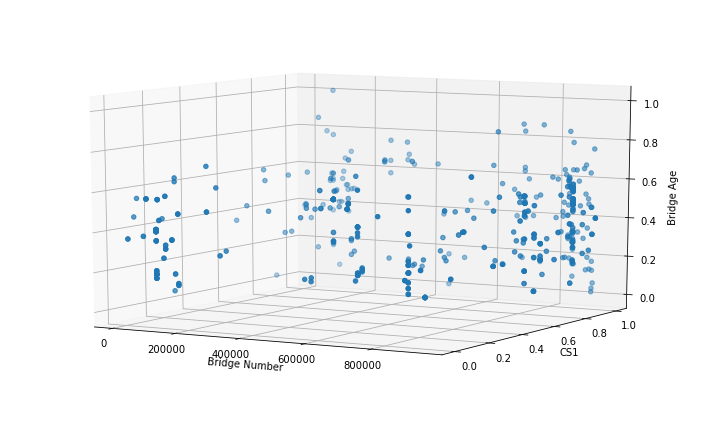

In [17]:
#3D Visualization
fig = plt.figure()
fig.set_size_inches(12.5, 7.5)
ax = fig.add_subplot(111, projection='3d')

#nbe_df = NBE_df[nbe_df['STRUCNUM'] <=1000]
ax.scatter(xs=NBE_element_Train_df['Bridge_Number'], ys=NBE_element_Train_df['CS1'], zs=NBE_element_Train_df['Bridge_Age'])
ax.set_ylabel('CS1'); ax.set_xlabel('Bridge Number'); ax.set_zlabel('Bridge Age')
ax.view_init(10, -60)

E:\Winpython Installation\WPy64-3771\python-3.7.7.amd64\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


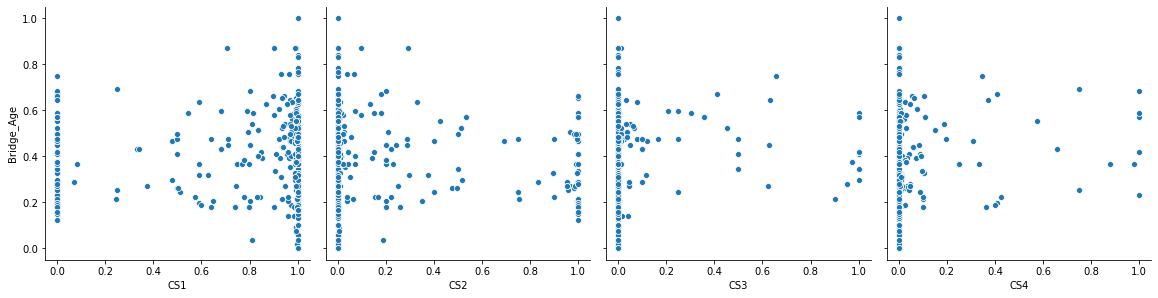

In [18]:
# 2D Visulization
# Using pairplot we'll visualize the data for correlation
sns.pairplot(NBE_element_Train_df, x_vars=['CS1', 'CS2', 'CS3', 'CS4'], 
             y_vars='Bridge_Age', size=4, aspect=1, kind='scatter')
plt.show()

## Multi-output Prediction (k-Nearest Neighbors Regression)

### *Decision Tree with Minimum Features*

In [19]:
#Train Dataset
X1_train = Data_Train_df.loc[:,['MAINTENANCE_021_1', 'MAINTENANCE_021_2', 'MAINTENANCE_021_4', 'MAINTENANCE_021_11',
                                'MAINTENANCE_021_21', 'MAINTENANCE_021_25', 'MAINTENANCE_021_26', 'MAINTENANCE_021_31',
                                'MAINTENANCE_021_33', 'Bridge_Age', 'ADT_029', 'DEGREES_SKEW_034', 'SERVICE_ON_042A_1',
                                'SERVICE_ON_042A_5', 'SERVICE_ON_042A_6', 'SERVICE_ON_042A_7', 'SERVICE_ON_042A_8',
                                'SERVICE_UND_042B_0', 'SERVICE_UND_042B_1', 'SERVICE_UND_042B_2', 'SERVICE_UND_042B_3',
                                'SERVICE_UND_042B_4', 'SERVICE_UND_042B_5', 'SERVICE_UND_042B_6', 'SERVICE_UND_042B_7',
                                'SERVICE_UND_042B_8', 'SERVICE_UND_042B_9', 'STRUCTURE_KIND_043A_3', 'STRUCTURE_KIND_043A_4',
                                'STRUCTURE_TYPE_043B_2', 'STRUCTURE_TYPE_043B_3', 'STRUCTURE_TYPE_043B_6',
                                'STRUCTURE_TYPE_043B_7', 'STRUCTURE_TYPE_043B_15', 'STRUCTURE_TYPE_043B_16',
                                'STRUCTURE_TYPE_043B_17', 'APPR_KIND_044A_0', 'APPR_KIND_044A_1', 'APPR_KIND_044A_2',
                                'APPR_KIND_044A_3', 'APPR_KIND_044A_4', 'APPR_KIND_044A_5', 'APPR_KIND_044A_6', 'APPR_TYPE_044B_0', 
                                'APPR_TYPE_044B_1', 'APPR_TYPE_044B_2', 'APPR_TYPE_044B_3', 'APPR_TYPE_044B_4', 'APPR_TYPE_044B_5', 
                                'APPR_TYPE_044B_6', 'APPR_TYPE_044B_11', 'APPR_TYPE_044B_20', 'APPR_TYPE_044B_21','DECK_COND_058', 
                                'SUBSTRUCTURE_COND_060', 'OPERATING_RATING_064', 'STRUCTURAL_EVAL_067', 'APPR_ROAD_EVAL_072',
                                'DECK_STRUCTURE_TYPE_107_1', 'DECK_STRUCTURE_TYPE_107_2', 'DECK_STRUCTURE_TYPE_107_3',
                                'DECK_STRUCTURE_TYPE_107_4', 'DECK_STRUCTURE_TYPE_107_5', 'DECK_STRUCTURE_TYPE_107_8', 
                                'SURFACE_TYPE_108A_0', 'SURFACE_TYPE_108A_1', 'SURFACE_TYPE_108A_2', 'SURFACE_TYPE_108A_5',
                                'SURFACE_TYPE_108A_6', 'SURFACE_TYPE_108A_9', 'DECK_PROTECTION_108C_0', 'DECK_PROTECTION_108C_1', 
                                'DECK_PROTECTION_108C_6','DECK_PROTECTION_108C_7', 'DECK_PROTECTION_108C_9', 'PERCENT_ADT_TRUCK_109']]
Y1_train = Data_Train_df.loc[:,['CS1', 'CS2','CS3','CS4']]

#Test Dataset
X1_test = Data_Test_df.loc[:,['MAINTENANCE_021_1', 'MAINTENANCE_021_2', 'MAINTENANCE_021_4', 'MAINTENANCE_021_11',
                                'MAINTENANCE_021_21', 'MAINTENANCE_021_25', 'MAINTENANCE_021_26', 'MAINTENANCE_021_31',
                                'MAINTENANCE_021_33', 'Bridge_Age', 'ADT_029', 'DEGREES_SKEW_034', 'SERVICE_ON_042A_1',
                                'SERVICE_ON_042A_5', 'SERVICE_ON_042A_6', 'SERVICE_ON_042A_7', 'SERVICE_ON_042A_8',
                                'SERVICE_UND_042B_0', 'SERVICE_UND_042B_1', 'SERVICE_UND_042B_2', 'SERVICE_UND_042B_3',
                                'SERVICE_UND_042B_4', 'SERVICE_UND_042B_5', 'SERVICE_UND_042B_6', 'SERVICE_UND_042B_7',
                                'SERVICE_UND_042B_8', 'SERVICE_UND_042B_9', 'STRUCTURE_KIND_043A_3', 'STRUCTURE_KIND_043A_4',
                                'STRUCTURE_TYPE_043B_2', 'STRUCTURE_TYPE_043B_3', 'STRUCTURE_TYPE_043B_6',
                                'STRUCTURE_TYPE_043B_7', 'STRUCTURE_TYPE_043B_15', 'STRUCTURE_TYPE_043B_16',
                                'STRUCTURE_TYPE_043B_17', 'APPR_KIND_044A_0', 'APPR_KIND_044A_1', 'APPR_KIND_044A_2',
                                'APPR_KIND_044A_3', 'APPR_KIND_044A_4', 'APPR_KIND_044A_5', 'APPR_KIND_044A_6', 'APPR_TYPE_044B_0', 
                                'APPR_TYPE_044B_1', 'APPR_TYPE_044B_2', 'APPR_TYPE_044B_3', 'APPR_TYPE_044B_4', 'APPR_TYPE_044B_5', 
                                'APPR_TYPE_044B_6', 'APPR_TYPE_044B_11', 'APPR_TYPE_044B_20', 'APPR_TYPE_044B_21','DECK_COND_058', 
                                'SUBSTRUCTURE_COND_060', 'OPERATING_RATING_064', 'STRUCTURAL_EVAL_067', 'APPR_ROAD_EVAL_072',
                                'DECK_STRUCTURE_TYPE_107_1', 'DECK_STRUCTURE_TYPE_107_2', 'DECK_STRUCTURE_TYPE_107_3',
                                'DECK_STRUCTURE_TYPE_107_4', 'DECK_STRUCTURE_TYPE_107_5', 'DECK_STRUCTURE_TYPE_107_8', 
                                'SURFACE_TYPE_108A_0', 'SURFACE_TYPE_108A_1', 'SURFACE_TYPE_108A_2', 'SURFACE_TYPE_108A_5',
                                'SURFACE_TYPE_108A_6', 'SURFACE_TYPE_108A_9', 'DECK_PROTECTION_108C_0', 'DECK_PROTECTION_108C_1', 
                                'DECK_PROTECTION_108C_6','DECK_PROTECTION_108C_7', 'DECK_PROTECTION_108C_9', 'PERCENT_ADT_TRUCK_109']]
Y1_test = Data_Test_df.loc[:,['CS1', 'CS2','CS3','CS4']]

In [20]:
# Fit the model
Prediction_Model_1 = KNeighborsRegressor()
Prediction_Model_1.fit(X1_train, Y1_train)

KNeighborsRegressor()

In [21]:
predictions_1 = Prediction_Model_1.predict(X1_test)

In [22]:
predictions_1

array([[9.99986835e-01, 0.00000000e+00, 0.00000000e+00, 1.31648236e-05],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.90105326e-01, 2.05528624e-01, 0.00000000e+00, 4.36604960e-03],
       [9.41114172e-01, 5.77259475e-02, 0.00000000e+00, 1.15988083e-03],
       [9.41508084e-01, 5.73472600e-02, 0.00000000e+00, 1.14465589e-03],
       [3.61993472e-01, 5.00000000e-01, 1.00000000e-01, 3.80065281e-02],
       [9.96793651e-01, 0.00000000e+00, 0.00000000e+00, 3.20634921e-03],
       [7.31635105e-01, 2.47580359e-01, 2.07845359e-02, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.63111401e-01, 2.36141578e-01, 3.90866584e-01, 9.88043668e-03],
       [4.00000000e-01, 0.00000000e+00, 6.00000000e-01, 0.00000000e+00],
       [0.00000000e+00, 9.78481732e-01, 0.00000000e

### *K-fold Cross Validation (10-fold)*

In [23]:
# evaluate multioutput regression model with k-fold cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import absolute
from numpy import mean
from numpy import std

# define the evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate the Prediction_Model and collect the scores
n_scores = cross_val_score(Prediction_Model_1, X1_train, Y1_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# force the scores to be positive
n_scores = absolute(n_scores)

# summarize performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: 0.114 (0.014)


### *Validation*

In [24]:
X1_test

,MAINTENANCE_021_1,MAINTENANCE_021_2,MAINTENANCE_021_4,MAINTENANCE_021_11,MAINTENANCE_021_21,MAINTENANCE_021_25,MAINTENANCE_021_26,MAINTENANCE_021_31,MAINTENANCE_021_33,Bridge_Age,...,SURFACE_TYPE_108A_2,SURFACE_TYPE_108A_5,SURFACE_TYPE_108A_6,SURFACE_TYPE_108A_9,DECK_PROTECTION_108C_0,DECK_PROTECTION_108C_1,DECK_PROTECTION_108C_6,DECK_PROTECTION_108C_7,DECK_PROTECTION_108C_9,PERCENT_ADT_TRUCK_109
0,0,0,0,0,0,0,0,0,1,0.268817,...,0,0,0,0,1,0,0,0,0,0.24
1,1,0,0,0,0,0,0,0,0,0.322581,...,0,0,0,0,1,0,0,0,0,0.08
2,1,0,0,0,0,0,0,0,0,0.193548,...,0,0,0,0,1,0,0,0,0,0.08
3,0,0,0,0,1,0,0,0,0,0.537634,...,0,0,0,0,1,0,0,0,0,0.12
4,1,0,0,0,0,0,0,0,0,0.537634,...,0,0,0,0,0,0,1,0,0,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,0,0,0,0,0,0,0,1,0,0.623656,...,0,0,0,0,1,0,0,0,0,0.04
190,1,0,0,0,0,0,0,0,0,0.279570,...,0,0,0,0,1,0,0,0,0,0.30
191,1,0,0,0,0,0,0,0,0,0.559140,...,0,0,0,0,1,0,0,0,0,0.08
192,0,0,1,0,0,0,0,0,0,0.365591,...,0,0,0,0,1,0,0,0,0,0.04


In [25]:
# make predictions for Input Bridge Age and ADT_29
print('[%CS1, %CS2, %CS3, %CS4]:', Prediction_Model_1.predict([X1_test.iloc[0]]))
print('MAE:', metrics.mean_absolute_error(Y1_test, predictions_1))
print('MSE:', metrics.mean_squared_error(Y1_test, predictions_1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y1_test, predictions_1)))
print('R-Square:',metrics.r2_score(Y1_test, predictions_1))

[%CS1, %CS2, %CS3, %CS4]: [[9.99986835e-01 0.00000000e+00 0.00000000e+00 1.31648236e-05]]
MAE: 0.09449961305921654
MSE: 0.04726951509032292
RMSE: 0.21741553553121018
R-Square: 0.05481147583168827


In [26]:
Y1_test.iloc[0]

CS1    1.0
CS2    0.0
CS3    0.0
CS4    0.0
Name: 0, dtype: float64

In [27]:
#Defining MAPE function
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape
# Using MAPE error metrics to check for the error rate and accuracy level
LR_MAPE= MAPE(Y1_test, predictions_1)
print("MAPE: ",LR_MAPE)

MAPE:  CS1    inf
CS2    inf
CS3    inf
CS4    inf
dtype: float64


### *Decision Tree with Maximum Features*

In [28]:
#Train Dataset
X2_train = Data_Train_df.loc[:,['Bridge_Age', 'ADT_029', 'DEGREES_SKEW_034', 'DECK_COND_058', 'SUPERSTRUCTURE_COND_059',
                                'SUBSTRUCTURE_COND_060', 'OPERATING_RATING_064', 'INVENTORY_RATING_066', 'STRUCTURAL_EVAL_067',
                                'APPR_ROAD_EVAL_072', 'PERCENT_ADT_TRUCK_109', 'MAINTENANCE_021_1', 'MAINTENANCE_021_2', 
                                'MAINTENANCE_021_4', 'MAINTENANCE_021_11', 'MAINTENANCE_021_21', 'MAINTENANCE_021_25', 
                                'MAINTENANCE_021_26', 'MAINTENANCE_021_31', 'MAINTENANCE_021_33', 'SERVICE_ON_042A_1',
                                'SERVICE_ON_042A_5', 'SERVICE_ON_042A_6', 'SERVICE_ON_042A_7', 'SERVICE_ON_042A_8', 
                                'SERVICE_UND_042B_0', 'SERVICE_UND_042B_1', 'SERVICE_UND_042B_2', 'SERVICE_UND_042B_3', 
                                'SERVICE_UND_042B_4', 'SERVICE_UND_042B_5', 'SERVICE_UND_042B_6', 'SERVICE_UND_042B_7',
                                'SERVICE_UND_042B_8', 'SERVICE_UND_042B_9', 'STRUCTURE_KIND_043A_3', 'STRUCTURE_KIND_043A_4', 
                                'STRUCTURE_TYPE_043B_2', 'STRUCTURE_TYPE_043B_3', 'STRUCTURE_TYPE_043B_6', 
                                'STRUCTURE_TYPE_043B_7', 'STRUCTURE_TYPE_043B_15', 'STRUCTURE_TYPE_043B_16', 
                                'STRUCTURE_TYPE_043B_17', 'APPR_KIND_044A_0', 'APPR_KIND_044A_1', 'APPR_KIND_044A_2', 
                                'APPR_KIND_044A_3', 'APPR_KIND_044A_4', 'APPR_KIND_044A_5', 'APPR_KIND_044A_6', 
                                'APPR_TYPE_044B_0', 'APPR_TYPE_044B_1', 'APPR_TYPE_044B_2', 'APPR_TYPE_044B_3', 
                                'APPR_TYPE_044B_4', 'APPR_TYPE_044B_5', 'APPR_TYPE_044B_6', 'APPR_TYPE_044B_11', 
                                'APPR_TYPE_044B_20', 'APPR_TYPE_044B_21', 'DECK_STRUCTURE_TYPE_107_1', 
                                'DECK_STRUCTURE_TYPE_107_2', 'DECK_STRUCTURE_TYPE_107_3', 'DECK_STRUCTURE_TYPE_107_4', 
                                'DECK_STRUCTURE_TYPE_107_5', 'DECK_STRUCTURE_TYPE_107_8', 'SURFACE_TYPE_108A_0',
                                'SURFACE_TYPE_108A_1', 'SURFACE_TYPE_108A_2', 'SURFACE_TYPE_108A_5', 'SURFACE_TYPE_108A_6',
                                'SURFACE_TYPE_108A_9', 'DECK_PROTECTION_108C_0', 'DECK_PROTECTION_108C_1', 
                                'DECK_PROTECTION_108C_6','DECK_PROTECTION_108C_7', 'DECK_PROTECTION_108C_9']]
Y2_train = Data_Train_df.loc[:,['CS1', 'CS2','CS3','CS4']]

#Test Dataset
X2_test = Data_Test_df.loc[:,['Bridge_Age', 'ADT_029', 'DEGREES_SKEW_034', 'DECK_COND_058', 'SUPERSTRUCTURE_COND_059',
                                'SUBSTRUCTURE_COND_060', 'OPERATING_RATING_064', 'INVENTORY_RATING_066', 'STRUCTURAL_EVAL_067',
                                'APPR_ROAD_EVAL_072', 'PERCENT_ADT_TRUCK_109', 'MAINTENANCE_021_1', 'MAINTENANCE_021_2', 
                                'MAINTENANCE_021_4', 'MAINTENANCE_021_11', 'MAINTENANCE_021_21', 'MAINTENANCE_021_25', 
                                'MAINTENANCE_021_26', 'MAINTENANCE_021_31', 'MAINTENANCE_021_33', 'SERVICE_ON_042A_1',
                                'SERVICE_ON_042A_5', 'SERVICE_ON_042A_6', 'SERVICE_ON_042A_7', 'SERVICE_ON_042A_8', 
                                'SERVICE_UND_042B_0', 'SERVICE_UND_042B_1', 'SERVICE_UND_042B_2', 'SERVICE_UND_042B_3', 
                                'SERVICE_UND_042B_4', 'SERVICE_UND_042B_5', 'SERVICE_UND_042B_6', 'SERVICE_UND_042B_7',
                                'SERVICE_UND_042B_8', 'SERVICE_UND_042B_9', 'STRUCTURE_KIND_043A_3', 'STRUCTURE_KIND_043A_4', 
                                'STRUCTURE_TYPE_043B_2', 'STRUCTURE_TYPE_043B_3', 'STRUCTURE_TYPE_043B_6', 
                                'STRUCTURE_TYPE_043B_7', 'STRUCTURE_TYPE_043B_15', 'STRUCTURE_TYPE_043B_16', 
                                'STRUCTURE_TYPE_043B_17', 'APPR_KIND_044A_0', 'APPR_KIND_044A_1', 'APPR_KIND_044A_2', 
                                'APPR_KIND_044A_3', 'APPR_KIND_044A_4', 'APPR_KIND_044A_5', 'APPR_KIND_044A_6', 
                                'APPR_TYPE_044B_0', 'APPR_TYPE_044B_1', 'APPR_TYPE_044B_2', 'APPR_TYPE_044B_3', 
                                'APPR_TYPE_044B_4', 'APPR_TYPE_044B_5', 'APPR_TYPE_044B_6', 'APPR_TYPE_044B_11', 
                                'APPR_TYPE_044B_20', 'APPR_TYPE_044B_21', 'DECK_STRUCTURE_TYPE_107_1', 
                                'DECK_STRUCTURE_TYPE_107_2', 'DECK_STRUCTURE_TYPE_107_3', 'DECK_STRUCTURE_TYPE_107_4', 
                                'DECK_STRUCTURE_TYPE_107_5', 'DECK_STRUCTURE_TYPE_107_8', 'SURFACE_TYPE_108A_0',
                                'SURFACE_TYPE_108A_1', 'SURFACE_TYPE_108A_2', 'SURFACE_TYPE_108A_5', 'SURFACE_TYPE_108A_6',
                                'SURFACE_TYPE_108A_9', 'DECK_PROTECTION_108C_0', 'DECK_PROTECTION_108C_1', 
                                'DECK_PROTECTION_108C_6','DECK_PROTECTION_108C_7', 'DECK_PROTECTION_108C_9']]
Y2_test = Data_Test_df.loc[:,['CS1', 'CS2','CS3','CS4']]

In [29]:
# Fit the model
Prediction_Model_2 = KNeighborsRegressor()
Prediction_Model_2.fit(X2_train, Y2_train)

KNeighborsRegressor()

In [30]:
#Predictions
predictions_2 = Prediction_Model_2.predict(X2_test)
predictions_2

array([[9.99986835e-01, 0.00000000e+00, 0.00000000e+00, 1.31648236e-05],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.90105326e-01, 2.05528624e-01, 0.00000000e+00, 4.36604960e-03],
       [9.41114172e-01, 5.77259475e-02, 0.00000000e+00, 1.15988083e-03],
       [9.41508084e-01, 5.73472600e-02, 0.00000000e+00, 1.14465589e-03],
       [3.61993472e-01, 5.00000000e-01, 1.00000000e-01, 3.80065281e-02],
       [9.96793651e-01, 0.00000000e+00, 0.00000000e+00, 3.20634921e-03],
       [7.31635105e-01, 2.47580359e-01, 2.07845359e-02, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.97143917e-01, 2.02732443e-01, 3.90617577e-01, 9.50606276e-03],
       [4.00000000e-01, 0.00000000e+00, 6.00000000e-01, 0.00000000e+00],
       [0.00000000e+00, 9.78481732e-01, 0.00000000e

### *K-fold Cross Validation (10-fold)*

In [31]:
# evaluate multioutput regression model with k-fold cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import absolute
from numpy import mean
from numpy import std

# define the evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate the Prediction_Model and collect the scores
n_scores_2 = cross_val_score(Prediction_Model_2, X2_train, Y2_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# force the scores to be positive
n_scores_2 = absolute(n_scores_2)

# summarize performance
print('MAE: %.3f (%.3f)' % (mean(n_scores_2), std(n_scores_2)))

MAE: 0.114 (0.014)


### *Validation*

In [32]:
# make predictions for Input Bridge Age and ADT_29
print('[%CS1, %CS2, %CS3, %CS4]:', Prediction_Model_2.predict([X2_test.iloc[0]]))
print('MAE:', metrics.mean_absolute_error(Y2_test, predictions_2))
print('MSE:', metrics.mean_squared_error(Y2_test, predictions_2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y2_test, predictions_2)))
print('R-Square:',metrics.r2_score(Y2_test, predictions_2))

[%CS1, %CS2, %CS3, %CS4]: [[9.99986835e-01 0.00000000e+00 0.00000000e+00 1.31648236e-05]]
MAE: 0.0941007453643389
MSE: 0.046911903257540015
RMSE: 0.21659155860176088
R-Square: 0.05811595859272439


In [33]:
Y1_test.iloc[0]

CS1    1.0
CS2    0.0
CS3    0.0
CS4    0.0
Name: 0, dtype: float64

In [34]:
#Defining MAPE function
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape
# Using MAPE error metrics to check for the error rate and accuracy level
LR_MAPE= MAPE(Y2_test, predictions_2)
print("MAPE: ",LR_MAPE)

MAPE:  CS1    inf
CS2    inf
CS3    inf
CS4    inf
dtype: float64
